In [1]:
import re
import gzip
from collections import OrderedDict

def load_sequences(seqfile):
        seqs = OrderedDict()
        fp = gzip.open(seqfile, "rb")
        print("#Loading " + seqfile + " ...")
        for line in fp:
            line=line.decode('utf8').split()
            seqs.update({line[0]:line[1]})
        fp.close()
        print("#Loaded " + str(len(seqs)) + " sequences from " + seqfile)
        return seqs

In [2]:
import random

pos_seqs_dict= load_sequences('/users/eprakash/git/interpret-benchmark/data/dnase_positives/common_scripts/H1/sequences/sim_positives.txt.gz')
neg_seqs_dict= load_sequences('/users/eprakash/git/interpret-benchmark/data/dnase_positives/common_scripts/H1/sequences/sim_negatives.txt.gz')
pos_labels=pos_seqs_dict.keys()
neg_labels=neg_seqs_dict.keys()
pos_seqs=pos_seqs_dict.values()
neg_seqs=neg_seqs_dict.values()

#Loading /users/eprakash/git/interpret-benchmark/data/dnase_positives/common_scripts/H1/sequences/sim_positives.txt.gz ...
#Loaded 86557 sequences from /users/eprakash/git/interpret-benchmark/data/dnase_positives/common_scripts/H1/sequences/sim_positives.txt.gz
#Loading /users/eprakash/git/interpret-benchmark/data/dnase_positives/common_scripts/H1/sequences/sim_negatives.txt.gz ...
#Loaded 913975 sequences from /users/eprakash/git/interpret-benchmark/data/dnase_positives/common_scripts/H1/sequences/sim_negatives.txt.gz


In [3]:
def gc_content(seq):
    g_count=seq.lower().count('g')
    c_count=seq.lower().count('c')
    return float(g_count+c_count)/float(len(seq))

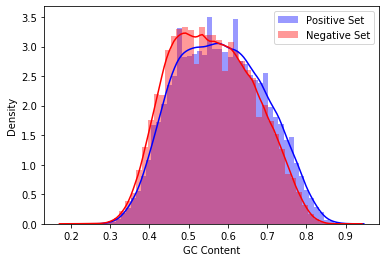

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot([gc_content(x) for x in pos_seqs], color='blue', axlabel='GC Content', label='Positive Set')
sns.distplot([gc_content(x) for x in neg_seqs], color='red', axlabel='GC Content', label='Negative Set')
plt.legend()
plt.ylabel('Density')
plt.show()